In [1]:
import re
import csv
import requests
from bs4 import BeautifulSoup
import nltk
from wordcloud import WordCloud
import pandas as pd

In [3]:
url = 'https://www.ptt.cc/bbs/NBA/index.html'

r = requests.get(url) #抓取指定網址

soup = BeautifulSoup(r.text,"html.parser")
results = soup.select("div.title")
print(results)

[<div class="title">
<a href="/bbs/NBA/M.1611396220.A.B48.html">[新聞] 不滿足湖人戰績長紅 戴維斯自評表現有待加強</a>
</div>, <div class="title">
<a href="/bbs/NBA/M.1611398544.A.38F.html">Re: [討論] KI為什麼拿不到得分王?</a>
</div>, <div class="title">
<a href="/bbs/NBA/M.1611402987.A.C30.html">[新聞] 盛讚小鮑爾球風 海瓦德：和唐西奇、衛少</a>
</div>, <div class="title">
<a href="/bbs/NBA/M.1611404093.A.06C.html">[討論] 主客場球隊球衣顏色疑問</a>
</div>, <div class="title">
<a href="/bbs/NBA/M.1611404577.A.E3E.html">Re: [討論] 籃網不交易的話該怎麼搭最好?</a>
</div>, <div class="title">
<a href="/bbs/NBA/M.1611404593.A.BA7.html">[情報] 本賽季平均每回合單打得分排行榜</a>
</div>, <div class="title">
<a href="/bbs/NBA/M.1611404792.A.620.html">Re: [討論] 主客場球隊球衣顏色疑問</a>
</div>, <div class="title">
<a href="/bbs/NBA/M.1611406425.A.90E.html">[情報] Jordan Bell和巫師簽十日短約</a>
</div>, <div class="title">
<a href="/bbs/NBA/M.1611410759.A.CCF.html">[花邊] 杰倫：須找回我們的頑強和團結，我們缺</a>
</div>, <div class="title">
<a href="/bbs/NBA/M.1611411117.A.17B.html">[情報] ★今日排名(2021.01.23)★</a>
</div>, <div class="title">

In [4]:
n=1 #你想抓幾頁的資料
url = 'https://www.ptt.cc/bbs/NBA/index.html'

# 抓取相關資訊  
def get_article_content(article_url):
  r = requests.get(article_url)
  soup = BeautifulSoup(r.text,"html.parser")
  results = soup.select("span.article-meta-value")
  if results:
    print("作者:", results[0].text)
    print("看板:", results[1].text)
    print("標題:", results[2].text)
    print("時間:", results[3].text)
    # print("------------------------------")

# 抓取某篇的留言
def get_article_content_inside(article_url):
  r = requests.get(article_url)
  soup = BeautifulSoup(r.text,"html.parser")
  articles = soup.find_all('div','push')
  for article in articles:
    messages = article.find('span','f3 push-content').getText().replace(':','').strip()
    print('messages =', messages)


def get_great_bad(article_url):
  r = requests.get(article_url)
  soup = BeautifulSoup(r.text,"html.parser")
  articles = soup.find_all('div','push')

  message = []
  a=0
  b=0
  c=0
  for article in articles:
    messages = article.find('span','f1 hl push-tag')
    if messages==None:
      messages = article.find('span','hl push-tag').getText().strip()
      message.append(messages)
    else:
      messages = article.find('span','f1 hl push-tag').getText().strip()
      message.append(messages)

  for i in message:
    if i == '噓':
      a+=1
    elif i == '推':
      b+=1
    else:
      c+=1

  print('噓:',a,'  推:',b,'  →:',c)
  print("------------------------------")

# 抓取標題
def get_all_href(url):
  r = requests.get(url)
  soup = BeautifulSoup(r.text,"html.parser")
  results = soup.select("div.title")
  for item in results:
    a_item = item.select_one("a")
    title = item.text
    if a_item:
      # print(title, "https://www.ptt.cc" + a_item.get('href'))
      get_article_content(article_url="https://www.ptt.cc" + a_item.get('href'))
      # get_article_content_inside(article_url="https://www.ptt.cc" + a_item.get('href'))
      get_great_bad(article_url="https://www.ptt.cc" + a_item.get('href'))
  print('---------------next---------------')

# 抓所有連結
for page in range(1, n+1):
  r = requests.get(url)
  soup = BeautifulSoup(r.text,"html.parser")
  btn = soup.select('div.btn-group > a')
  up_page_href = btn[3]['href']
  next_page_url = "https://www.ptt.cc" + up_page_href
  url = next_page_url
  get_all_href(url)

作者: mingonly (想要告訴你!)
看板: NBA
標題: [花邊] Harden：球隊目前的問題不在於進攻端，
時間: Sat Jan 23 12:57:10 2021
噓: 2   推: 68   →: 44
------------------------------
噓: 1   推: 70   →: 46
------------------------------
作者: hhll5566 (忽溜56)
看板: NBA
標題: [討論] 三巨頭 9勝8敗 恐怖騎士 之間的關連性
時間: Sat Jan 23 13:21:15 2021
噓: 12   推: 25   →: 16
------------------------------
作者: LuckyoPuppy (LuckyPuppy)
看板: NBA
標題: [討論] 近2戰Harden、KI進階數據
時間: Sat Jan 23 13:28:30 2021
噓: 6   推: 50   →: 100
------------------------------
作者: josherion (Josh)
看板: NBA
標題: [花邊] Kyrie Irving:這兩場失利令人感到羞愧
時間: Sat Jan 23 13:34:54 2021
噓: 12   推: 53   →: 22
------------------------------
噓: 4   推: 38   →: 49
------------------------------
噓: 1   推: 35   →: 19
------------------------------
作者: ninaman (英勇勳章)
看板: NBA
標題: Re: [討論] 三巨頭 9勝8敗 恐怖騎士 之間的關連性
時間: Sat Jan 23 13:58:03 2021
噓: 1   推: 15   →: 8
------------------------------
作者: VeryGoodBoy (很棒的男孩)
看板: NBA
標題: [情報] KI:我們知道外界對我們有什麼樣的期待
時間: Sat Jan 23 14:03:33 2021
噓: 9   推: 89   →: 50
--------------------

In [4]:
url = "https://www.ptt.cc/bbs/NBA/M.1611370438.A.5E1.html"
r = requests.get(url)
soup = BeautifulSoup(r.text,"html.parser")
results = soup.select("span.article-meta-value")
if results:
    results = results[2].text
    result = re.sub(u"\\(.*?\\)|\\{.*?}|\\[.*?]", "", results)
    print(result)

 今天該幫籃網找甚麼理由???


In [10]:
url = "https://www.ptt.cc/bbs/NBA/M.1611370438.A.5E1.html"
r = requests.get(url)
soup = BeautifulSoup(r.text,"html.parser")
articles = soup.find_all('div','push')

message = []
a=0
b=0
c=0
# print(articles)
for article in articles:

  
  messages = article.find('span','f1 hl push-tag')
  if messages==None:
    messages = article.find('span','hl push-tag').getText().strip()
    message.append(messages)
  else:
    messages = article.find('span','f1 hl push-tag').getText().strip()
    message.append(messages)
  # print(messages) 
  # print(type(messages))

for i in message:
  if i == '噓':
    a+=1
  elif i == '推':
    b+=1
  else:
    c+=1
  # print(i)

print('噓:',a,'\n推:',b,'\n→:',c)

噓: 23 
推: 172 
→: 139


In [11]:
url = "https://www.ptt.cc/bbs/NBA/M.1611370438.A.5E1.html"
r = requests.get(url)
soup = BeautifulSoup(r.text,"html.parser")
articles = soup.find_all('div','push')
for article in articles:
  messages = article.find('span','f3 push-content').getText().replace(':','').strip()
  print(messages)

第一篇報到
中二社運毒瘤 一回來就二連敗 舒服
=============某人歸隊後連輸兩場XDDD=============
KD沒上 不算數
沒KD阿   不然???
當然是Ki的錯啊
TENET
時差24小時
KD沒上，刷分仔沒下
KD：KD跟這群小貓拿不到冠軍
-11的錯
在你回來之後我們就開始輸球了
KD故意不打讓KI難堪 XD
爽
糗爺牌還失準
太久沒打 背靠背很累耶
太早 明天有機會三連敗
因為KD沒上呀
可能要說 KD沒上吧 不過KD在 上一場也是打爆
#KI的錯
KD吹密
本來就ki的錯 上場狂自幹
大哥不在啊
KD隊友都小貓是要打個屁
場上四個又雷我KI 都快40分還贏不了
KD才是真大腿 鬍子+KI就是火箭隊第二阿
KI拿去換艾倫啦
沒有kd 下一場三巨頭嚇死大家
我一直以為有爆炸頭的那隊 才是籃網 原來我錯了
沒KD就是刷分坦隊而已，不然你以為多強
KD沒上？上一場有KD也輸欸...
KI一上球就停滯了 射手當然找不到節奏
KD沒上怎麼贏
鬍子的錯 連單打都不會
時空背景不一樣啦！
Ki一神帶四坑
KD沒上阿 不過籃網這種天天拚120分的陣容感覺不行
KD好懷念地獄勇
當然是KI的錯啊 獵巫獵起來
老大不在，剩菜雞
KI先30分了 這場鬍子輸了
Ki在場上球也停滯 當然還是Ki的錯
藏
防守完全不行啊
沒KD不算啦
不然明天鬍子休息 交叉測試看看
KD上了50怎麼可能輸？
在你上的時候我們就輸過了
誰上場就輸球    就自己承認吧
KD：KD想回到舒適圈了
不勞您費心吧 哈哈哈
回來前，鬍子升天，回來後，鬍子...
籃板數差了將近一倍 進攻強但是人家回合比你多啊
少KD啦 巨頭不夠多啊
交叉測試阿，看誰單獨帶隊輸最多
敗持都看得出來是誰的問題
怪kd不在場上幫忙擋切
籃網這樣還想打湖人...？
KD沒上才輸12分，KD有上至少贏12分吧
現在就C3取2各種配對試試看啊 不合的那個就滾出去
超討厭KI 幹分根本不差他一個
今天kd 不上就知道禁區被虐爆了
KI該出怪聲了八
輪流盤球了半天進攻火力是很猛沒錯
KD沒打扣分，KI有打大扣分
KI要是得130分就贏了 所以都是KI的錯
在做實驗 看那個對照組輸球輸最多
38分領繩去
Ki今天還笑嗎？
有人回歸就連敗 很明顯了吧
拿KI去換騎士內線 包準起飛
裁判不幫忙啊
KD+JH > KD+KI >

In [5]:
n=1 #你想抓幾頁的資料
url = 'https://www.ptt.cc/bbs/NBA/index.html'

result_all = []

# 抓取相關資訊  
def get_article_content(article_url):
  r = requests.get(article_url)
  soup = BeautifulSoup(r.text,"html.parser")
  results = soup.select("span.article-meta-value")
  if results:
    results = results[2].text
    result = re.sub(u"\\(.*?\\)|\\{.*?}|\\[.*?]", "", results)
    with open('output.csv', 'w', newline='') as csvfile:
        # 建立 CSV 檔寫入器
        writer = csv.writer(csvfile)
        # 寫入一列資料
        writer.writerow(result)
    result_all.append(result)
    
    # print(result)
    # print("------------------------------")

# 抓取標題
def get_all_href(url):
  r = requests.get(url)
  soup = BeautifulSoup(r.text,"html.parser")
  results = soup.select("div.title")
  for item in results:
    a_item = item.select_one("a")
    title = item.text
    if a_item:
      # print(title, "https://www.ptt.cc" + a_item.get('href'))
      get_article_content(article_url="https://www.ptt.cc" + a_item.get('href'))
      # get_article_content_inside(article_url="https://www.ptt.cc" + a_item.get('href'))
      get_great_bad(article_url="https://www.ptt.cc" + a_item.get('href'))
  print('---------------next---------------')

# 抓所有連結
for page in range(1, n+1):
  r = requests.get(url)
  soup = BeautifulSoup(r.text,"html.parser")
  btn = soup.select('div.btn-group > a')
  up_page_href = btn[3]['href']
  next_page_url = "https://www.ptt.cc" + up_page_href
  url = next_page_url
  get_all_href(url)

噓: 2   推: 68   →: 44
------------------------------
噓: 1   推: 70   →: 46
------------------------------
噓: 12   推: 25   →: 16
------------------------------
噓: 6   推: 50   →: 100
------------------------------
噓: 12   推: 53   →: 22
------------------------------
噓: 4   推: 38   →: 49
------------------------------
噓: 1   推: 35   →: 19
------------------------------
噓: 1   推: 15   →: 8
------------------------------
噓: 9   推: 89   →: 50
------------------------------
噓: 20   推: 31   →: 24
------------------------------
噓: 1   推: 24   →: 19
------------------------------
噓: 1   推: 45   →: 20
------------------------------
噓: 2   推: 30   →: 48
------------------------------
噓: 0   推: 59   →: 12
------------------------------
噓: 9   推: 36   →: 69
------------------------------
噓: 45   推: 42   →: 54
------------------------------
噓: 1   推: 11   →: 11
------------------------------
噓: 3   推: 134   →: 110
------------------------------
噓: 3   推: 138   →: 103
------------------------------
噓: 1

In [25]:
test=pd.DataFrame(data=result_all)
print(test)
test.to_csv('output.csv',encoding='utf_8_sig')

                            0
0       Harden：球隊目前的問題不在於進攻端，
1        三巨頭 9勝8敗 恐怖騎士 之間的關連性
2            近2戰Harden、KI進階數據
3    Kyrie Irving:這兩場失利令人感到羞愧
4   Re:  三巨頭 9勝8敗 恐怖騎士 之間的關連性
5         KI:我們知道外界對我們有什麼樣的期待
6            公鹿是不是該把握機會交易來KI?
7              NBA Standings 
8       Nance談雙殺籃網：下一步是擊敗綠衫軍，
9         Re:  籃網不交易的話該怎麼搭最好?
10      J.J. Barea 簽約西甲球團大學生隊
11          Re:  KI為什麼拿不到得分王?
12          KD和哈登真的不能轉型防守苦力嗎？
13        Re:  籃網不交易的話該怎麼搭最好?
14               狀元是不是太看輕NBA了
15                籃網對McGee有興趣
16            當初真的不能用KI單換鬍子嗎？


Building prefix dict from c:\Users\t1063\OneDrive\Desktop\crawler\dict.txt.big ...
Loading model from cache C:\Users\t1063\AppData\Local\Temp\jieba.u223ec812ac62164435353ecef1f5a616.cache
Loading model cost 1.852 seconds.
Prefix dict has been built successfully.


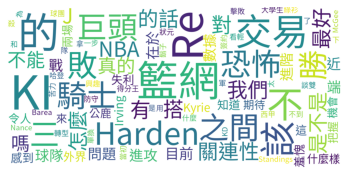

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import jieba
import numpy as np
# 如果檔案內有一些編碼錯誤，使用 errors='ignore' 來忽略錯誤
with open("output.csv", encoding="utf_8_sig", errors='ignore') as f:
    text = f.read()

# 設定使用 big5 斷詞
jieba.set_dictionary('dict.txt.big')
wordlist = jieba.cut(text)
words = " ".join(wordlist)
#文字雲造型圖片
mask = np.array(Image.open('picture.png')) #文字雲形狀
# 從 Google 下載的中文字型
font = 'SourceHanSansTW-Regular.otf'
#背景顏色預設黑色，改為白色、使用指定圖形、使用指定字體
my_wordcloud = WordCloud(background_color='white',mask=mask,font_path=font).generate(words)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [22]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\t1063\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.

